## Data Exploration

### ToDos/ Preliminary results:

- Replace Sizeestimate with NULL, where values are negative (-99), potentially replace with sizecategory (<2k NULL Values)
- No adaptation of data types neccessary
- Correlation between variables (target "killed", "injured") not visible at this stage
- Several negative values that need to be removed (killed, injured)
- Cluster Geospatial data/ redundant to locations?
- Remove further features
- Any kind of feature engineering neccessary?

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../pro-test/data/egypt_1_drop_non_impact_params.csv')

In [3]:
df.head()

,recordnumber,nameofevent,startdate,endate,governorate,district,disengcampas,location,gpslat,gpslong,...,milrepress,beltegeyyarepress,residentsrepress,partyrepress,employerrepress,MBrepress,otherrepress,killed,injured,arrested
0,201201004,NaN,12/31/2011,NaN,Alexandria,NaN,Muntazah,كنيسة القديسين,31.263166,29.992108,...,1,0,0,0,0,0,0,0,0,0
1,201201003,NaN,12/31/2011,1/1/2012,Cairo,NaN,Qasr Al-Nile,"ميدان التحرير , من دار القضاء العالى , من قصر...",30.045024,31.235532,...,0,0,0,0,0,0,0,0,0,0
2,201201012,NaN,12/31/2011,1/22/2012,Cairo,NaN,Qasr Al-Nile,دار القضاء العالى,30.052627,31.240259,...,0,0,0,0,0,0,1,1,0,0
3,201201002,NaN,1/1/2012,NaN,Cairo,NaN,Al Azbakiyya,محطة قطار رمسيس,30.062994,31.246995,...,0,0,0,0,0,0,0,0,0,0
4,201201009,NaN,1/1/2012,NaN,RedSea,NaN,Hurghada 1,مطار الغردقة,27.179844,33.809037,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(7522, 70)

In [17]:
df.isnull()

,recordnumber,nameofevent,startdate,endate,governorate,district,disengcampas,location,gpslat,gpslong,...,milrepress,beltegeyyarepress,residentsrepress,partyrepress,employerrepress,MBrepress,otherrepress,killed,injured,arrested
0,False,True,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7517,False,True,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7518,False,True,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7519,False,True,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7520,False,True,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
featuresdf_by_null_values = df.isnull().sum().sort_values(ascending = False)

In [33]:
number_of_observations = 7521

### Share of NULL Values by observations

In [34]:
featuresdf_by_null_values.head(15)/number_of_observations

sizeexact           0.893232
participantother    0.876745
endate              0.871161
organizer           0.835660
repressiontype      0.827018
nameofevent         0.822364
orgtype             0.811727
demandother         0.804015
campaign            0.774897
tacticsecondary     0.745380
district            0.664406
gpslat              0.156229
gpslong             0.156229
sizeestimate        0.106901
location            0.040952
dtype: float64

In [5]:
df.dtypes

recordnumber    object
nameofevent     object
startdate       object
endate          object
governorate     object
                 ...  
MBrepress        int64
otherrepress     int64
killed           int64
injured          int64
arrested         int64
Length: 70, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7522 entries, 0 to 7521
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   recordnumber       7522 non-null   object 
 1   nameofevent        1337 non-null   object 
 2   startdate          7522 non-null   object 
 3   endate             970 non-null    object 
 4   governorate        7522 non-null   object 
 5   district           2525 non-null   object 
 6   disengcampas       7226 non-null   object 
 7   location           7214 non-null   object 
 8   gpslat             6347 non-null   float64
 9   gpslong            6347 non-null   float64
 10  locationtype       7522 non-null   object 
 11  tahrir             7522 non-null   int64  
 12  ittihadeyya        7522 non-null   int64  
 13  parliament         7522 non-null   int64  
 14  rabaa              7522 non-null   int64  
 15  minofdef           7522 non-null   int64  
 16  sizeexact          804 n

In [7]:
df.describe()

,gpslat,gpslong,tahrir,ittihadeyya,parliament,rabaa,minofdef,sizeexact,antiMB,antiMorsi,...,milrepress,beltegeyyarepress,residentsrepress,partyrepress,employerrepress,MBrepress,otherrepress,killed,injured,arrested
count,6347.000000,6347.000000,7522.000000,7522.000000,7522.000000,7522.000000,7522.000000,8.040000e+02,7522.000000,7522.000000,...,7522.000000,7522.000000,7522.000000,7522.000000,7522.000000,7522.000000,7522.000000,7522.000000,7522.000000,7522.000000
mean,29.921999,31.333923,0.044536,0.023797,0.011699,0.002526,0.003457,5.066400e+03,0.273332,0.212709,...,0.017947,0.005717,0.017017,0.012098,0.009306,0.035496,0.028184,0.038687,2.157006,0.524462
std,1.441256,0.834791,0.206296,0.152426,0.107535,0.050198,0.058694,7.206200e+04,0.445699,0.409251,...,0.132769,0.075397,0.129342,0.109330,0.096024,0.185042,0.165509,0.658345,28.788755,6.526597
min,22.337358,25.075921,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,30.005159,31.068247,0.000000,0.000000,0.000000,0.000000,0.000000,8.625000e+01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.062833,31.237161,0.000000,0.000000,0.000000,0.000000,0.000000,2.300000e+02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.971564,31.410140,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.610851,36.419097,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000e+06,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,1602.000000,314.000000


In [31]:
df[df.columns[1:]].corr()['killed'][:].sort_values(ascending=False).to_frame()

,killed
killed,1.000000
injured,0.493804
arrested,0.145637
policerepress,0.112842
beltegeyyarepress,0.075904
residentsrepress,0.073464
milrepress,0.062029
MBrepress,0.058578
residents,0.057149
MBproperty,0.046938


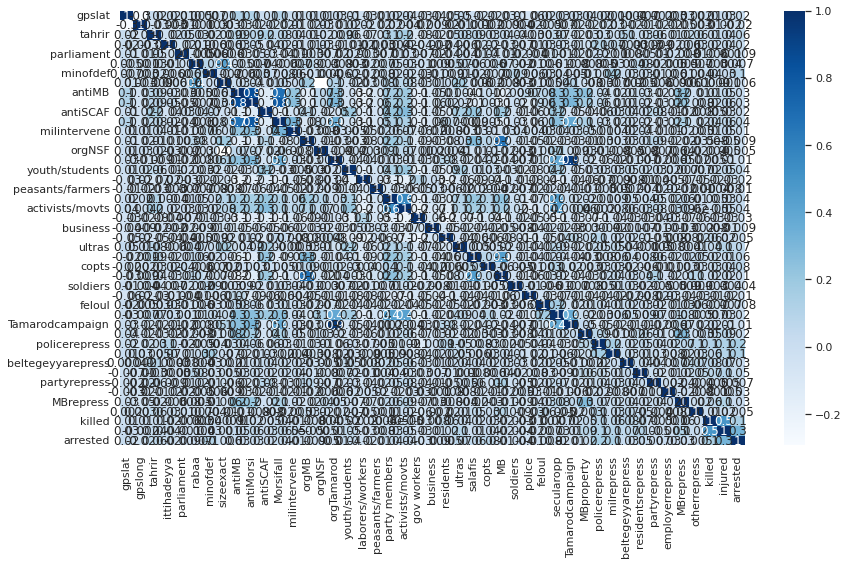

In [11]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')